In [1]:
import data
import loads
import knap
%matplotlib inline
def getTrueSets(appsD):
    if appsD and len(appsD) > 0:
        trueSets = []
        numApps = len(appsD)
        for time in xrange(len(appsD[0][0])):
            trueSet = []
            for appSet in appsD:
                if appSet[0][time] != 0:
                    trueSet.append(appSet[1])
            trueSets.append(trueSet)
        return trueSets

def getAccuracy(guessSets, appsD, D):
    trueSets = getTrueSets(appsD)
    if trueSets:
        total = float(sum([1 if guessSets[i][0][0] == tuple(trueSets[i]) else 0 for i in xrange(len(guessSets))])) 
        acc = total / float(len(guessSets))
        return acc



In [2]:
def runTests():
# D[i] is the required demand in watts
# 0<i<n, where n = 24*60/5 (5 min intervals)
    sampleTime = 5 #in minutes, connot be greater than one hour
    numberOfHours = 24 #can be multi day
    maxTime = numberOfHours*60/sampleTime             # number of sampleTime minute intervals#HOME LIST OF LOADS
#loads.dryerMachine,
#list of loads in the home
    home = [loads.washingMachine, loads.dryerMachine, loads.lightsEarly, loads.lightsLate, loads.fridge, loads.kettle,
            loads.coffeeMaker , loads.airConditioner, loads.ac2, loads.dryer2]
#home = [loads.fridge, loads.lightsEarly, loads.lightsLate] #, loads.draw]
    D, appsD = [d for d in data.calculateDemand(sampleTime, numberOfHours, home)]
    N = 3
    X = 100
    accuracy = 0.0
    sets1 = knap.findNSets(home, D, 1)
    sets2 = knap.findNSets(home, D, N)
    sets3 = knap.findSetsWithinX(home, D, 0.01)
    sets4 = knap.findSetsWithinX(home, D, 0.05)
    A1 = knap.getAppOnOffMap(sets1, D, home)
    A2 = knap.getAppOnOffMap(sets2, D, home)
    A3 = knap.getAppOnOffMap(sets3, D, home)
    A4 = knap.getAppOnOffMap(sets4, D, home)
    accuracy = getAccuracy(sets1, appsD, D)
    print accuracy
    knap.plotOnOffSingle(A1, D, home)

0.373702422145


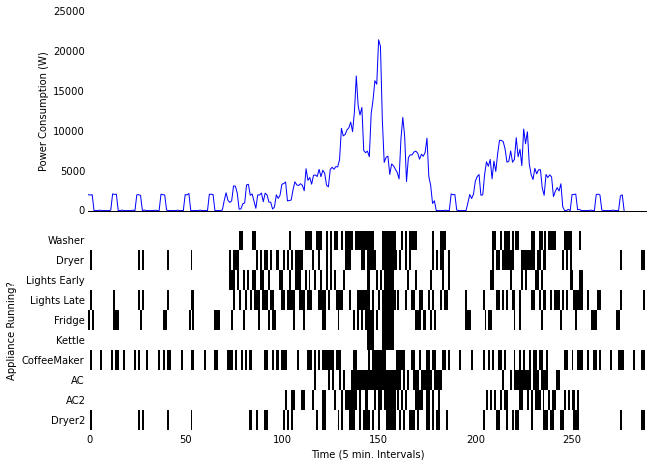

In [3]:
runTests()